# The Sparks Foundation Task - 1

## Prediction using Supervised ML

>Predict the percentage of an student based on the no. of study hours.
>>What will be predicted score if a student studies for 9.25 hrs/ day?

● This is a simple linear regression task as it involves just 2 variables.

### Data can be found at http://bit.ly/w-data

## Importing the Libraries

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [102]:
df = pd.read_csv('http://bit.ly/w-data')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Analyzing the Data

In [46]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [47]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [48]:
df.shape

(25, 2)

## Checking the Null Values

In [49]:
df.isnull().sum()   #As we can see there are no NULL values present

Hours     0
Scores    0
dtype: int64

### As the number of study hours are increasing the percentage score is also increasing


Text(0.5, 0, 'Hours')

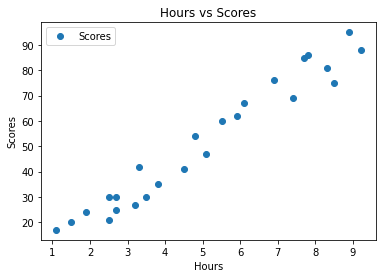

In [50]:
df.plot(x='Hours', y='Scores', style ='o')
plt.title('Hours vs Scores')
plt.ylabel('Scores')
plt.xlabel('Hours')



## Data Prepration

In [51]:
X = df.iloc[:, :-1]
y = df.iloc[:,1]

## Splitting the data using Skikit-Learn's *train_test_split()*method

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Training Dataset

In [82]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

### Intercept

In [83]:
lm.intercept_

2.018160041434683

### Coefficient

In [84]:
lm.coef_

array([9.91065648])

# Plotting the Regression Line

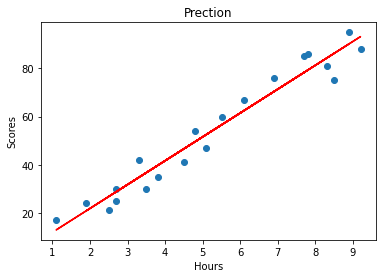

In [85]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 2.018160041434683 + 9.91065648*X_train, 'r' )
plt.title('Prection')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

## Predicted Values

In [96]:
print(X_test)
y_pred = lm.predict(X_test)
print(y_pred)

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


## Actual Values

In [95]:
print(y_test)

5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64


## Actual Values vs Predicted Values

In [120]:
ds = pd.DataFrame({'Acrual Data' : y_test, 'Pridected Data' : y_pred})
ds.reset_index(drop=True, inplace=True)
ds

,Acrual Data,Pridected Data
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Predicting the Score For the Study Hour 9.25

In [124]:
pred_score = lm.predict([[9.25]])
print(pred_score)

[93.69173249]


# Evaluating The Model

In [125]:
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred)) 
print("Mean Squared Error:" ,metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:" ,np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Explained Variance Score:" ,metrics.explained_variance_score(y_test,y_pred))


Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
Explained Variance Score: 0.9482829156738147
